In [1]:
%pylab inline
import pandas as pd
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


## Load CSV file into memory

In [2]:
data = pd.read_csv('/home/nagar/Desktop/uber-raw-data-apr14.csv')

In [3]:
data.head()


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
data['Date/Time']=data['Date/Time'].map(pd.to_datetime)

In [5]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [6]:
def get_dom(dt):
    return dt.day
data['dom']=data['Date/Time'].map(get_dom)

In [7]:
data.tail()

,Date/Time,Lat,Lon,Base,dom
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [8]:
def get_weekday(dt):
    return dt.weekday()
data['Weekday']=data['Date/Time'].map(get_weekday)
def get_hour(dt):
    return dt.hour
data['Hour']=data['Date/Time'].map(get_hour)
data.tail()

,Date/Time,Lat,Lon,Base,dom,Weekday,Hour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


## Analysis

#### Analysing the Day of month(dom)

Text(0.5, 1.0, 'Frequency by Day of month-April 2019')

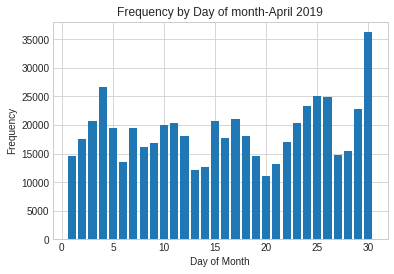

In [11]:
hist(data.dom,bins=30,rwidth=.8,range=(.5,30.5))
style.use('seaborn-whitegrid')
xlabel('Day of Month')
ylabel('Frequency')
title("Frequency by Day of month-April 2019")

In [12]:
def count_rows(rows): 
    return len(rows)

In [13]:
by_data=data.groupby('dom').apply(count_rows)
by_data

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

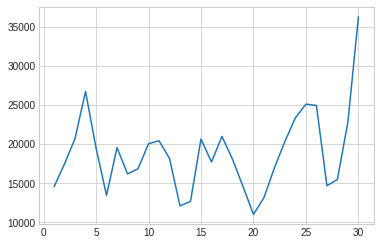

In [14]:
plot(by_data)

Text(0.5, 1.0, 'Frequency by Day of month-April 2019')

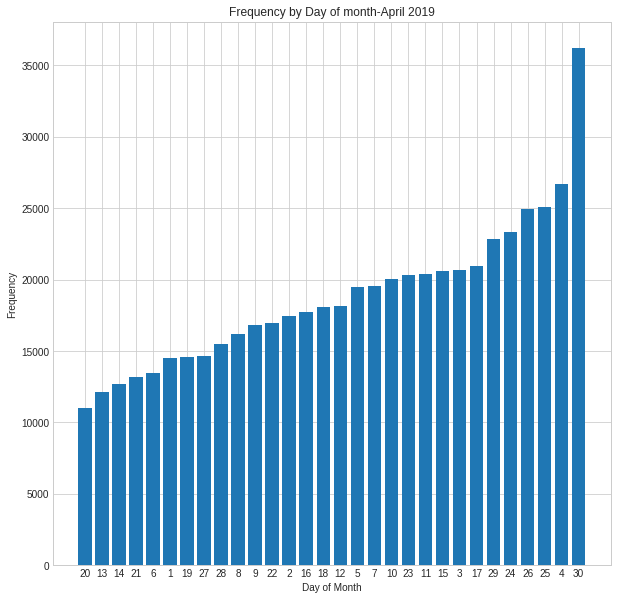

In [24]:
figure(figsize=[10,10])
by_datasorted=by_data.sort_values()
bar(range(1,31),by_datasorted,width=.8)
style.use('seaborn-whitegrid')
xticks(range(1,31),by_datasorted.index)
xlabel('Day of Month')
ylabel('Frequency')
title("Frequency by Day of month-April 2019")


## Analyse by Hour

Text(0.5, 1.0, 'Frequency by Hour of day in month-April 2019')

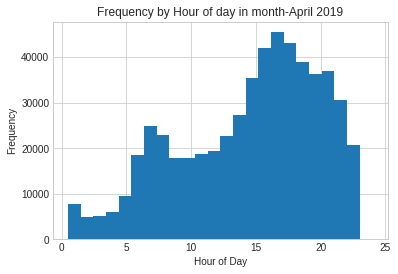

In [25]:
hist(data['Hour'],bins=24,range=(.5,24))
xlabel('Hour of Day')
style.use('seaborn-whitegrid')
ylabel('Frequency')
title("Frequency by Hour of day in month-April 2019")

## Analyse the weekdays

Text(0.5, 1.0, 'Frequency by Weekdays in month-April 2019')

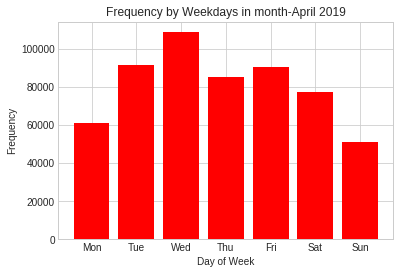

In [26]:
hist(data['Weekday'],bins=7,range=(-0.5,6.5),color='red',rwidth=0.8)
xticks(range(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
style.use('seaborn-whitegrid')
xlabel('Day of Week')
ylabel('Frequency')
title("Frequency by Weekdays in month-April 2019")

## Cross Analysis(hour,dow)

In [27]:
by_cross=data.groupby(['Weekday','Hour']).apply(count_rows).unstack()

([<matplotlib.axis.YTick at 0x7f681a48b7b8>,
 <a list of 7 Text yticklabel objects>)

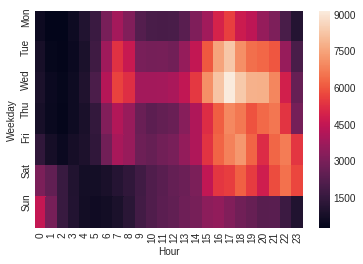

In [28]:

sb.heatmap(by_cross,color='blue')
yticks(range(7),['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

## Analysis by Latitude and Longitude

''

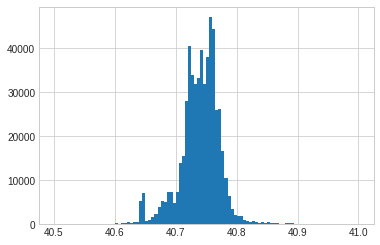

In [29]:

hist(data['Lat'],bins=100,range=(40.5,41))
style.use('seaborn-whitegrid')
;

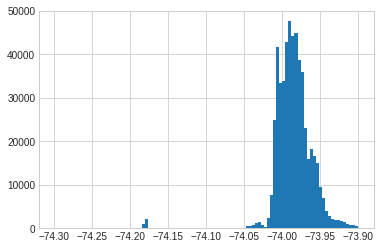

In [30]:
hist(data['Lon'],bins=100,range=(-74.3,-73.9))
style.use('seaborn-whitegrid')


''

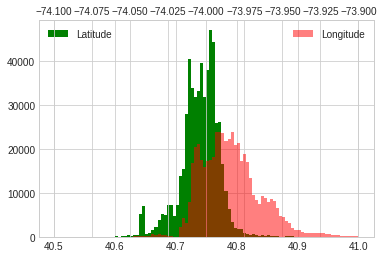

In [31]:
hist(data['Lat'],bins=100,range=(40.5,41),color='g',label='Latitude')
legend(loc='upper left')
twiny()
hist(data['Lon'],bins=100,range=(-74.1,-73.9),color='r',alpha=.5,label='Longitude')
style.use('seaborn-whitegrid')
legend(loc='best')
;

Text(0.5, 1.0, 'Region Wise Distribution')

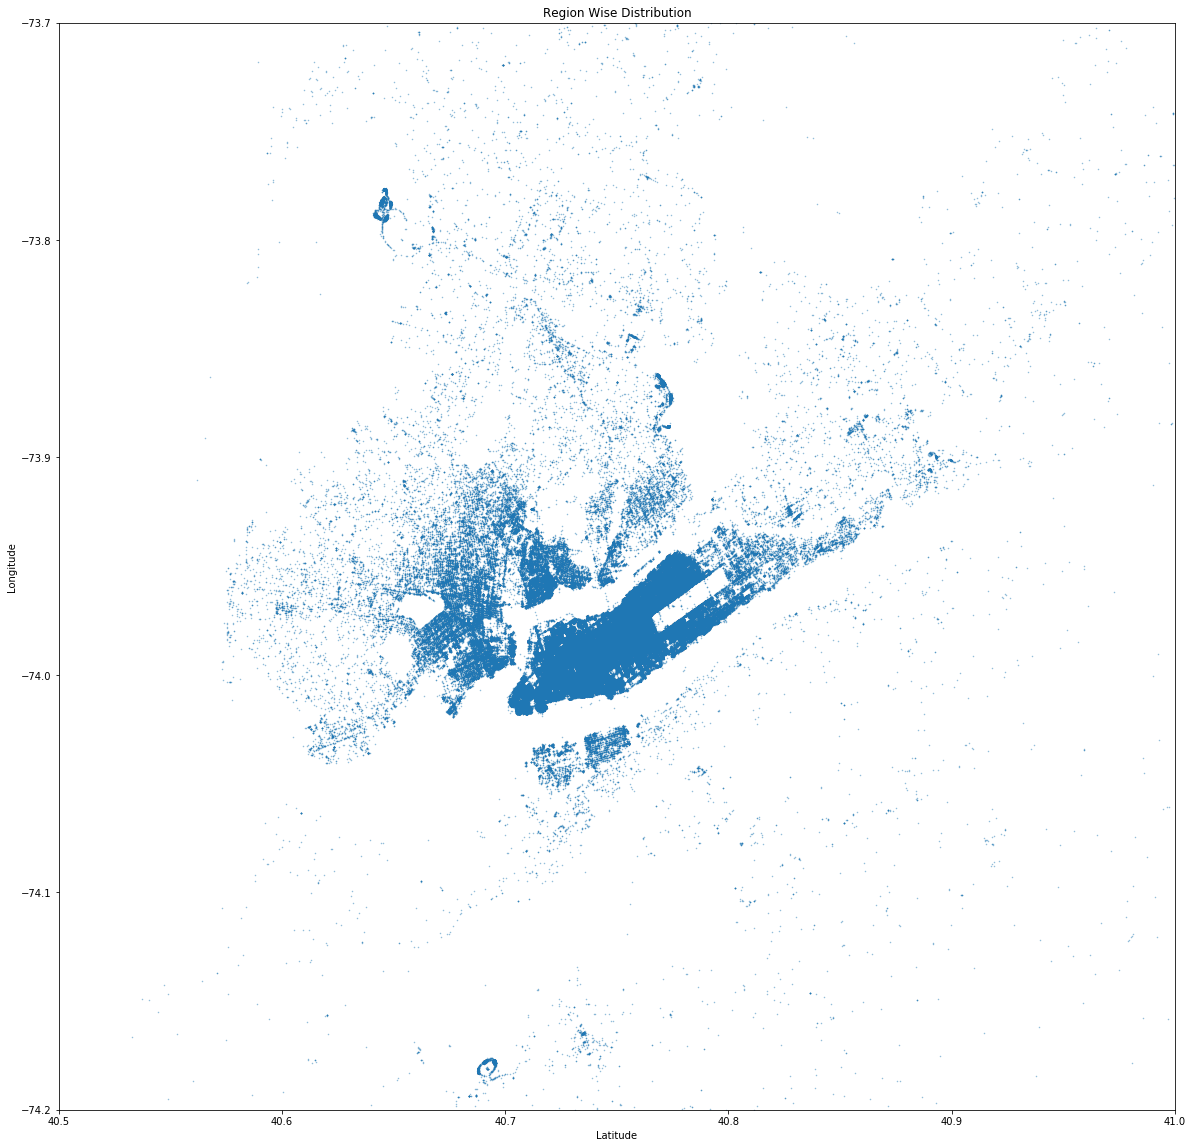

In [107]:
figure(figsize=[20,20])
plot(data['Lat'],data['Lon'],'.',ms=1,alpha=.5)
ylim(-74.2,-73.7)
xlim(40.5,41)
xlabel('Latitude')
ylabel('Longitude')
title("Region Wise Distribution")